In [43]:
import pandas as pd
import numpy as np
from scipy import stats

In [44]:
from bokeh.io import curdoc, output_notebook
from bokeh.models import Slider, HoverTool
from bokeh.layouts import widgetbox, row, column
from bokeh.io import output_notebook, show, output_file 
from bokeh.models import GeoJSONDataSource, LinearColorMapper, ColorBar
from bokeh.palettes import brewer
import json
from bokeh.resources import INLINE 
from bokeh.io import curdoc
from bokeh.plotting import figure, ColumnDataSource

In [45]:
terr_1 = pd.read_csv("data/terr_1.csv" , index_col = 0) 


In [46]:
import geopandas as gpd

shapefile = '/home/pratyush/Downloads/ne_110m_admin_0_countries.shp'
gdf = gpd.read_file(shapefile)[['ADMIN', 'ADM0_A3', 'geometry']]
gdf.columns = ['country', 'country_code', 'geometry']
gdf.head()  #reading shp file

country country_code  \
0                         Fiji          FJI   
1  United Republic of Tanzania          TZA   
2               Western Sahara          SAH   
3                       Canada          CAN   
4     United States of America          USA   

                                            geometry  
0  MULTIPOLYGON (((180.00000 -16.06713, 180.00000...  
1  POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...  
2  POLYGON ((-8.66559 27.65643, -8.66512 27.58948...  
3  MULTIPOLYGON (((-122.84000 49.00000, -122.9742...  
4  MULTIPOLYGON (((-122.84000 49.00000, -120.0000...

In [47]:
gdf = gdf.drop(gdf.index[159])

In [48]:
terr_1.head()


country  Year  deaths
0  Afghanistan  1973     0.0
1  Afghanistan  1979    53.0
2  Afghanistan  1987     0.0
3  Afghanistan  1988   128.0
4  Afghanistan  1989    10.0

In [49]:
gdf.head()

country country_code  \
0                         Fiji          FJI   
1  United Republic of Tanzania          TZA   
2               Western Sahara          SAH   
3                       Canada          CAN   
4     United States of America          USA   

                                            geometry  
0  MULTIPOLYGON (((180.00000 -16.06713, 180.00000...  
1  POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...  
2  POLYGON ((-8.66559 27.65643, -8.66512 27.58948...  
3  MULTIPOLYGON (((-122.84000 49.00000, -122.9742...  
4  MULTIPOLYGON (((-122.84000 49.00000, -120.0000...

In [9]:
#Define function that returns json_data for year selected by user.
    
def json_data(selectedYear):
    yr = selectedYear
    df_yr = terr_1[terr_1['Year'] == yr]
    merged = gdf.merge(df_yr, on = 'country', how = 'left')
    merged.fillna('No data', inplace = True)
    merged_json = json.loads(merged.to_json())
    json_data = json.dumps(merged_json)
    return json_data
#Input GeoJSON source that contains features for plotting.
geosource = GeoJSONDataSource(geojson = json_data(2018))
#Define a sequential multi-hue color palette.
palette = brewer['Reds'][9]
#Reverse color order so that dark blue is highest obesity.
palette = palette[::-1]
#Instantiate LinearColorMapper that linearly maps numbers in a range, into a sequence of colors. Input nan_color.
color_mapper = LinearColorMapper(palette = palette, low = 0, high = 500, nan_color = '#d9d9d9')
#Define custom tick labels for color bar.
tick_labels = {'0': '0%', '50': '50', '100':'100', '150':'150', '200':'200', '350':'350', '400':'400','450':'450', '500': '>500'}
#Add hover tool
hover = HoverTool(tooltips = [ ('Country/region','@country'),('Total Deaths', '@deaths')])
#Create color bar. 
color_bar = ColorBar(color_mapper=color_mapper, label_standoff=9,width = 500, height = 20,
                     border_line_color=None,location = (0,0), orientation = 'horizontal', 
                     major_label_overrides = tick_labels)
#Create figure object.
p = figure(title = 'Deaths Due To Terrorism, 2018', plot_height = 600 , plot_width = 950, 
           toolbar_location = None, tools = [hover])
p.xgrid.grid_line_color = None
p.ygrid.grid_line_color = None
#Add patch renderer to figure. 
p.patches('xs','ys', source = geosource,fill_color = {'field' :'deaths', 'transform' : color_mapper},
          line_color = 'black', line_width = 0.25, fill_alpha = 1)
#Specify layout
p.add_layout(color_bar, 'below')
# Define the callback function: update_plot
def update_plot(attr, old, new):
    yr = slider.value
    new_data = json_data(yr)
    geosource.geojson = new_data
    p.title.text = 'Deaths Due To Terrorisk, %d' %yr
    
# Make a slider object: slider 
slider = Slider(title = 'Year',start = 1975, end = 2018, step = 1, value = 2018)
slider.on_change('value', update_plot)
# Make a column layout of widgetbox(slider) and plot, and add it to the current document
layout = column(p,widgetbox(slider))
curdoc().add_root(layout)
#Display plot inline in Jupyter notebook
output_notebook()
#Display plot
show(layout)

Loading BokehJS ...

You are generating standalone HTML/JS output, but trying to use real Python
callbacks (i.e. with on_change or on_event). This combination cannot work.

Only JavaScript callbacks may be used with standalone output. For more
information on JavaScript callbacks with Bokeh, see:

    https://docs.bokeh.org/en/latest/docs/user_guide/interaction/callbacks.html

Alternatively, to use real Python callbacks, a Bokeh server application may
be used. For more information on building and running Bokeh applications, see:

    https://docs.bokeh.org/en/latest/docs/user_guide/server.html



In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

In [72]:
terr_19 = pd.read_csv("data/terr_19.csv" , index_col = 0)

In [74]:
terr_19.head(n=10)    

COUNTRY  SCORE
Rank                                            
1                             Afghanistan  9.603
2                                    Iraq  9.241
3                                 Nigeria  8.597
4                                   Syria  8.006
5                                Pakistan  7.889
6                                 Somalia  7.800
7                                   India  7.518
8                                   Yemen  7.259
9                             Philippines  7.137
10    Democratic Republic  jof the Congo  7.039

/home/pratyush/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 61538 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/pratyush/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 61539 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/pratyush/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 61538 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/pratyush/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 61539 missing from current font.
  font.set_text(s, 0, flags=flags)


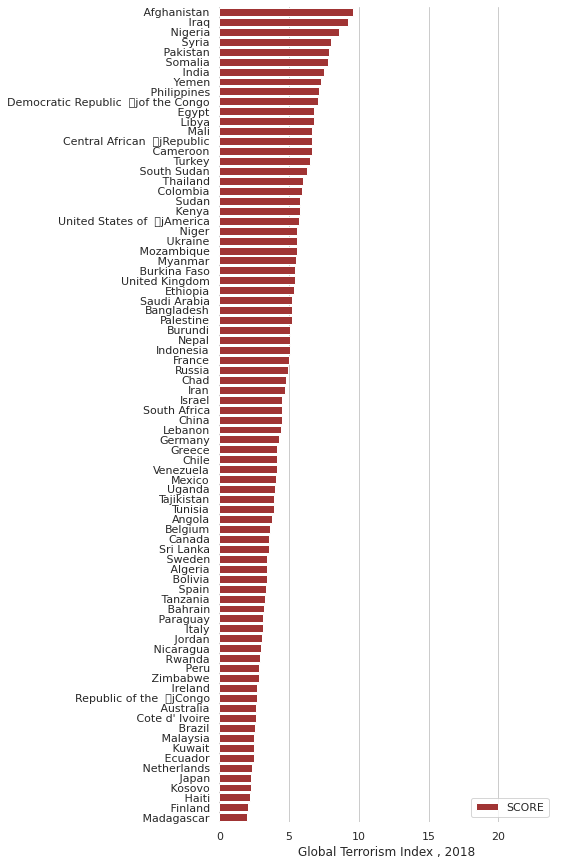

In [160]:
#set theme for plot
sns.set_theme(style = 'whitegrid')

#create axis and figure objects
f , ax = plt.subplots(figsize = (6,15))

#set color and create plot
sns.set_color_codes("pastel")
sns.barplot(x="SCORE", y="COUNTRY", data=terr_19,
            label="SCORE", color="firebrick")

#add legends , limits 
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 24), ylabel="",
       xlabel="Global Terrorism Index , 2018")
sns.despine(left=True, bottom=True) #remove spines from plot

plt.show()

In [50]:
france_terr = pd.read_csv("data/france_terr.csv" , index_col=0)
france_terr.head()

Year  Number ofincidents  Deaths  Injuries
0  2019                   3       4        16
1  2018                   3      10        30
2  2017                   9       3        16
3  2016                  12      89       451
4  2015                  36     161       300

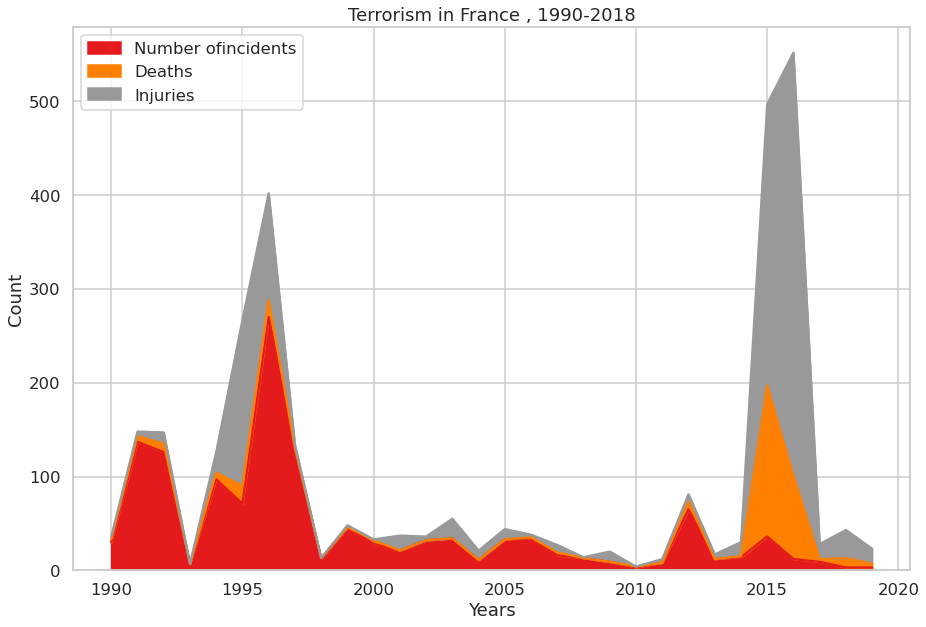

In [51]:
#create stacked area plot with color and size specified
france_terr.plot(x ='Year' , kind = 'area' , stacked=True ,figsize=(15,10) ,colormap = plt.get_cmap('Set1')) 

#Set title , labels
plt.title('Terrorism in France , 1990-2018')
plt.ylabel('Count')
plt.xlabel('Years')

plt.show()

In [52]:
france_ref = pd.read_csv('data/france_ref.csv' ,index_col =0)
france_ref.head()

Year  Refugees Granted Asylum  Annual % Change
0  1990                   193000             0.00
1  1991                   174756            -9.45
2  1992                   156512           -10.44
3  1993                   166269             6.23
4  1994                   195288            17.45

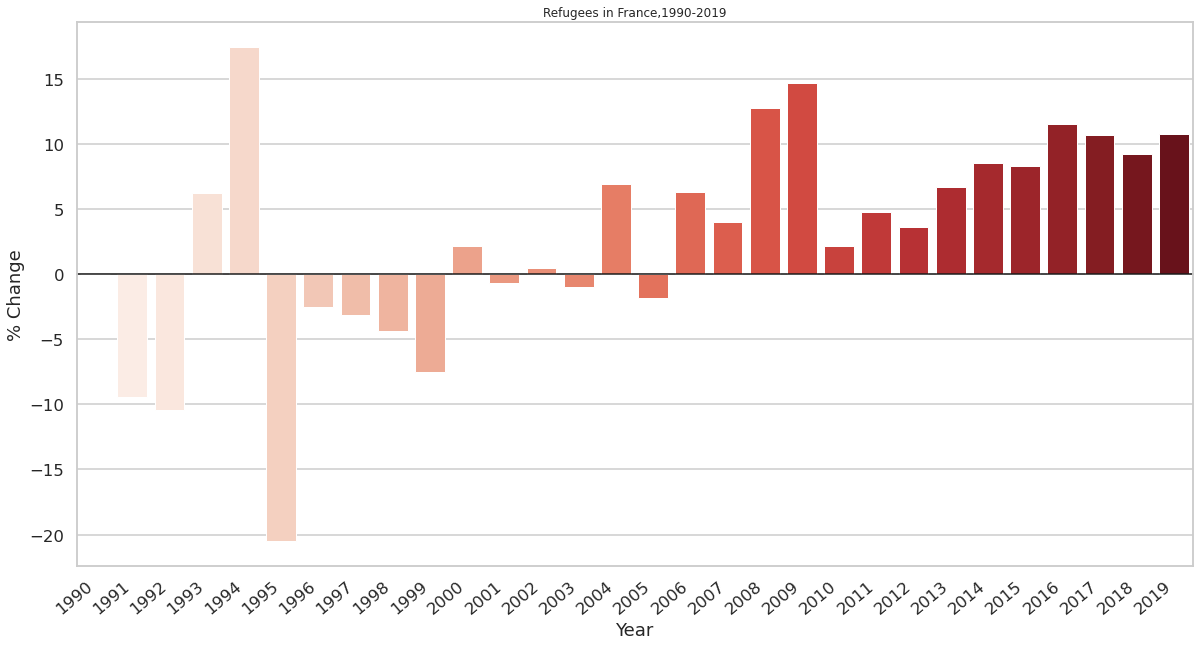

In [53]:
#create figure and axis objects
f,ax = plt.subplots(figsize=(20, 10))

#set plot theme
sns.set_theme(style="whitegrid")

#create bar plot
sns.barplot(x='Year', y='Annual % Change',data = france_ref ,palette='Reds')
ax.axhline(0, color="k", clip_on=False) #add horizontal line at 0

#set title , label 
ax.set_ylabel("% Change")
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right") #xlabel using tick labels with rotation
ax.set_title('Refugees in France,1990-2019')
plt.show()

In [12]:
ref_ter = pd.read_csv('data/ref_ter.csv' , index_col= 0)
ref_ter.head()

Year  Refugees Granted Asylum  Annual % Change  Number ofincidents  Deaths  \
0  1990                   193000             0.00                  30       3   
1  1991                   174756            -9.45                 137       6   
2  1992                   156512           -10.44                 126       9   
3  1993                   166269             6.23                   7       0   
4  1994                   195288            17.45                  97       7   

   Injuries  
0         3  
1         5  
2        12  
3         0  
4        22

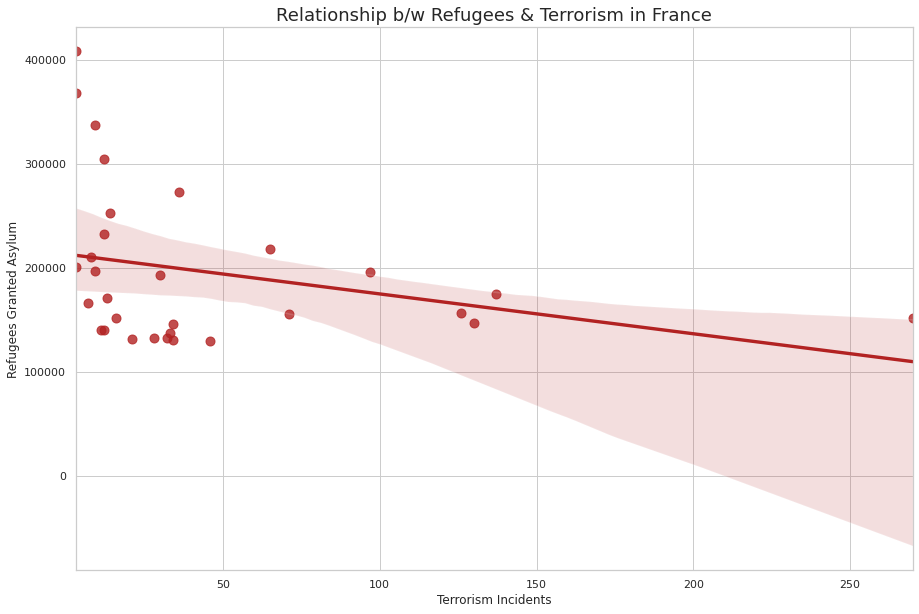

In [54]:
#create figure and axis objects
f,ax = plt.subplots(figsize=(15,10))
sns.set_theme(style="whitegrid", context="talk") #set plot theme

#create regression plot with title and labels
sns.regplot(x='Number ofincidents',y='Refugees Granted Asylum' , data = ref_ter , color ='firebrick' )
ax.set_title ('Relationship b/w Refugees & Terrorism in France')
ax.set_xlabel("Terrorism Incidents")


plt.show()

<AxesSubplot:xlabel='Number ofincidents', ylabel='Refugees Granted Asylum'>

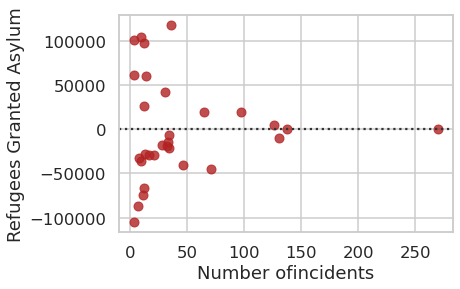

In [55]:
sns.residplot(x='Number ofincidents',y='Refugees Granted Asylum' , data = ref_ter , color ='firebrick' , order = 5)

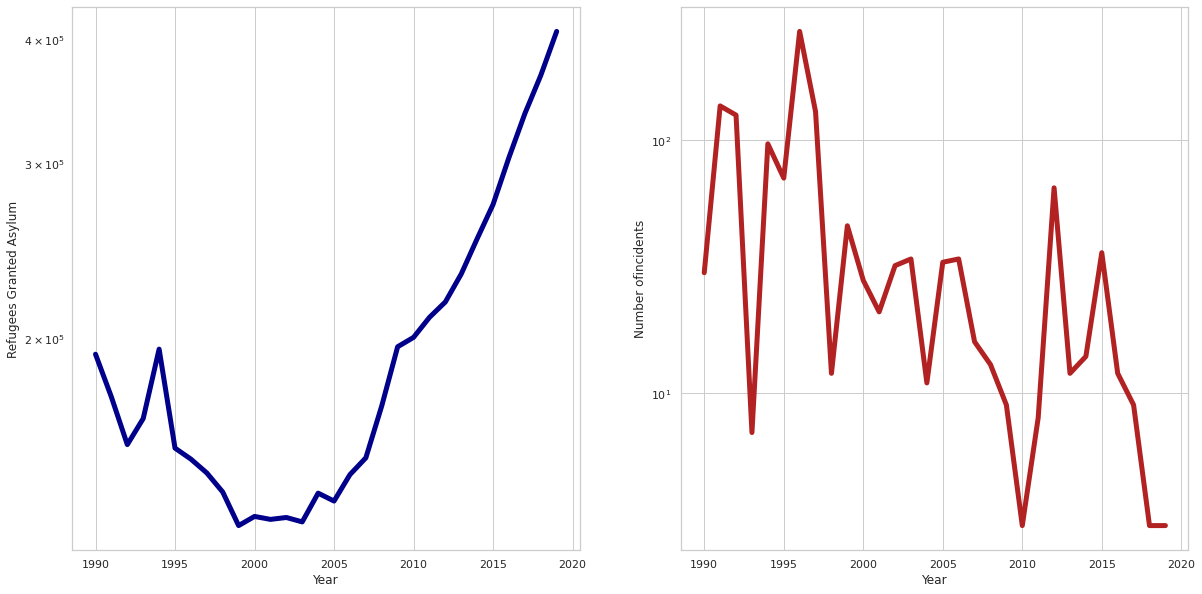

In [56]:
sns.set_theme(style="whitegrid")

f, (ax1,ax2) = plt.subplots(1, 2, figsize=(20, 10))

sns.lineplot(
    data=ref_ter,
    x="Year", y="Refugees Granted Asylum", color = 'darkblue' ,linewidth = 5,ax = ax1)
ax1.set_yscale('log')
sns.lineplot(
    data=ref_ter,
    x="Year", y="Number ofincidents", color = 'firebrick',linewidth = 5,ax = ax2)
ax2.set_yscale('log')
plt.show()


In [57]:
france_ref2 = pd.read_csv('data/france_ref2.csv' , index_col =0)
france_ref2.head()

country of origin  First time applicants in 2019
0       Afghanistan                           9995
1           Albania                           8010
2           Georgia                           7735
3            Guinea                           6600
4        Bangladesh                           5810

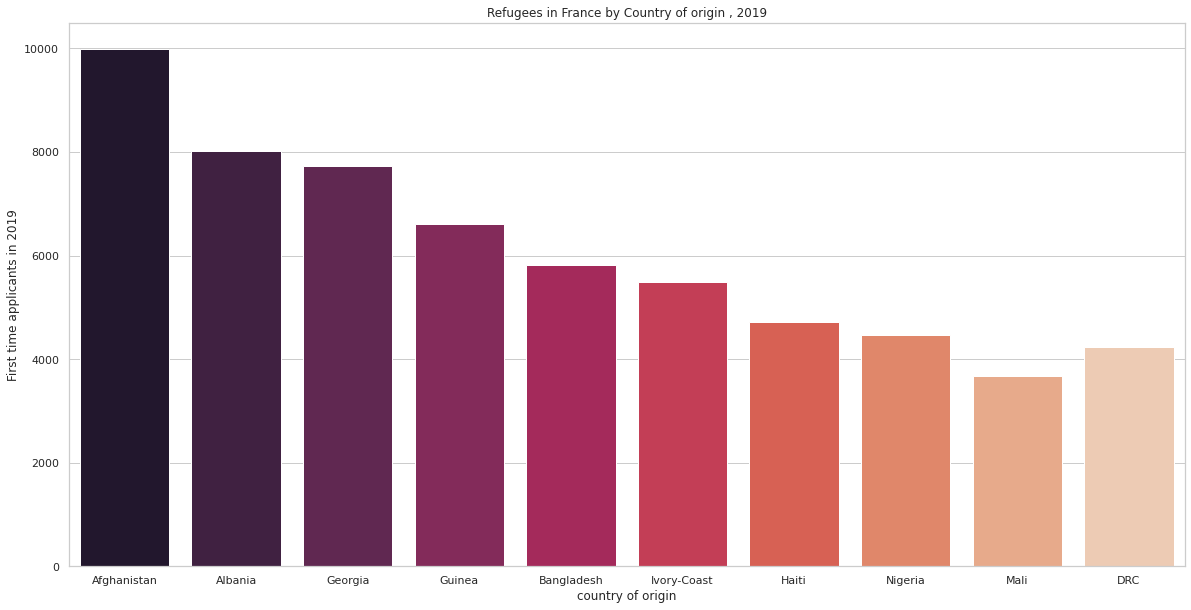

In [58]:
sns.set_theme(style="whitegrid")


f, ax = plt.subplots( figsize=(20, 10))

sns.barplot(x ='country of origin', y ='First time applicants in 2019',data = france_ref2 ,palette="rocket", ax=ax)
ax1.axhline(0, color="k", clip_on=False)
ax1.set_ylabel("First Time Applicants ") 
ax.set_title('Refugees in France by Country of origin , 2019')
plt.show()

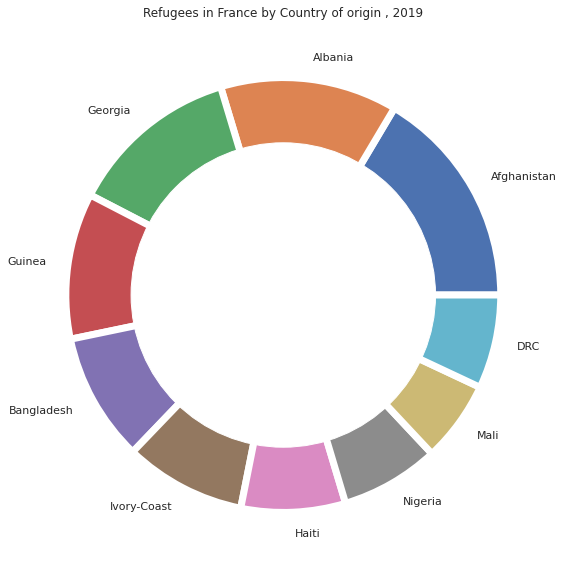

In [59]:
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')
f , ax = plt.subplots(figsize = (20,10))

#pie plots with wedges 
plt.pie('First time applicants in 2019', labels='country of origin', wedgeprops = { 'linewidth' : 7, 'edgecolor' : 'white' } , data=france_ref2)
p=plt.gcf() #p as current figure object
p.gca().add_artist(my_circle) # add inner circle to p
ax.set_title('Refugees in France by Country of origin , 2019')
plt.show()


In [60]:
asylum_seekers18 = pd.read_csv('data/asylum_seekers18.csv' , index_col = 0)
asylum_seekers18.head()

Country Name Country Code  year  asylum_seekers
0        Aruba          ABW  2018             NaN
1  Afghanistan          AFG  2018       2681267.0
2       Angola          AGO  2018          8243.0
3      Albania          ALB  2018         13512.0
4      Andorra          AND  2018             NaN

In [61]:
merged2 = gdf.merge(asylum_seekers18, left_on = 'country_code', right_on = 'Country Code', how = 'left')
merged2.fillna('No data', inplace = True) 

In [62]:
merged2.head()

country country_code  \
0                         Fiji          FJI   
1  United Republic of Tanzania          TZA   
2               Western Sahara          SAH   
3                       Canada          CAN   
4     United States of America          USA   

                                            geometry   Country Name  \
0  MULTIPOLYGON (((180.00000 -16.06713, 180.00000...           Fiji   
1  POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...       Tanzania   
2  POLYGON ((-8.66559 27.65643, -8.66512 27.58948...        No data   
3  MULTIPOLYGON (((-122.84000 49.00000, -122.9742...         Canada   
4  MULTIPOLYGON (((-122.84000 49.00000, -120.0000...  United States   

  Country Code     year asylum_seekers  
0          FJI     2018            675  
1          TZA     2018            723  
2      No data  No data        No data  
3          CAN     2018             81  
4          USA     2018            333

In [63]:
#Read data to json.
merged_json2 = json.loads(merged2.to_json())
#Convert to String like object.
json_data2 = json.dumps(merged_json2)

In [64]:
#Input GeoJSON source that contains features for plotting.
geosource2 = GeoJSONDataSource(geojson = json_data2)
#Define a sequential multi-hue color palette.
palette2 = brewer['PuBuGn'][9]
#Reverse color order so that dark blue is highest obesity.
palette2 = palette2[::-1]
#Instantiate LinearColorMapper that linearly maps numbers in a range, into a sequence of colors.
color_mapper2 = LinearColorMapper(palette = palette2, low = 0, high = 100000, nan_color = '#d9d9d9')
#Define custom tick labels for color bar.
tick_labels2 = {'0': '0', '20000': '20,000', '40000':'40,000', '60000':'60,000', '80000':'80,000', '100000':' > 1 lac'}
#Add hover tool
hover2 = HoverTool(tooltips = [ ('Country/region','@country'),('Total Asylum Seekers', '@asylum_seekers')])

#Create color bar. 
color_bar2 = ColorBar(color_mapper=color_mapper2, label_standoff=8,width = 500, height = 20,
border_line_color=None,location = (0,0), orientation = 'horizontal', major_label_overrides = tick_labels2)
#Create figure object.
p2 = figure(title = 'Asylum Seekers Based on Country of Origin, 2018', plot_height = 600 , plot_width = 950, 
            toolbar_location = None , tools = [hover2])
p2.xgrid.grid_line_color = None
p2.ygrid.grid_line_color = None
#Add patch renderer to figure. 
p2.patches('xs','ys', source = geosource2,fill_color = {'field' :'asylum_seekers', 'transform' : color_mapper2},
          line_color = 'black', line_width = 0.25, fill_alpha = 1)
#Specify figure layout.
p2.add_layout(color_bar2, 'below')
#Display figure inline in Jupyter Notebook.
output_notebook()
#Display figure.
show(p2)

Loading BokehJS ...